# Predicting the Sale Price of Bulldozers using Machine Learning

## 1. Problem Definition

> How well we can predict the future sale price of a bulldozer, given the features and previous example of the sale prices of simialr bulldozers.

## 2. Data

> Bluebook for Bulldozers competition from kaggle.

> There are three main datasets: train.csv, valid.csv and test.csv.

## 3. Evaluation

> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and the predicted auction prices. The goal would be to minimise it using machine learning model. 

## 4. Features


**Kaggle provides a data dictionary detailing all the features of the dataset. We can visit the data dictionary in the competition page in kaggle.**

SalesID       
MachineID           
ModelID          
datasource    
auctioneerID   
YearMade     
MachineHoursCurrentMeter     
UsageBand        
Saledate      
Saleprice        
fiModelDesc          
fiBaseModel          
fiSecondaryDesc       
fiModelSeries       
fiModelDescriptor        
ProductSize       
ProductClassDesc         
State      
ProductGroup     
ProductGroupDesc        
Drive_System         
Enclosure            
Forks          
Pad_Type            
Ride_Control            
Stick             
Transmission          
Turbocharged        
Blade_Extension         
Blade_Width       
Enclosure_Type           
Engine_Horsepower            
Hydraulics           
Pushblock            
Ripper                  
Scarifier                
Tip_control                 
Tire_Size                
Coupler            
Coupler_System              
Grouser_Tracks            
Hydraulics_Flow        
Track_Type              
Undercarriage_Pad_Width              
Stick_Length           
Thumb         
Pattern_Changer      
Grouser_Type         
Backhoe_Mounting       
Blade_Type      
Travel_Controls          
Differential_Type         
Steering_Controls         

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [26]:
# Import training and validation datasets

df = pd.read_csv(r"Data/bluebook-for-bulldozers/bluebook-for-bulldozers/Train.csv", low_memory = False)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [28]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

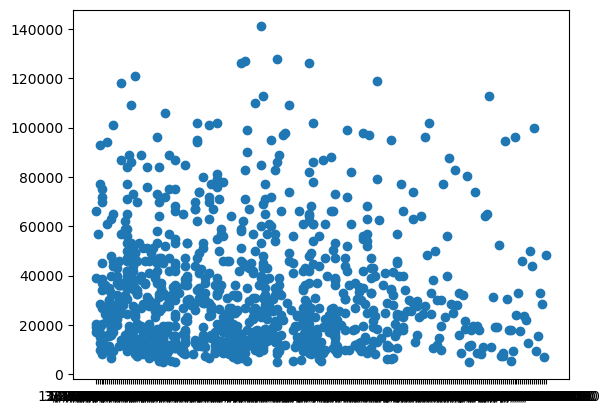

In [29]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [30]:
df.saledate[:1000] # Time series Problem

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<Axes: ylabel='Frequency'>

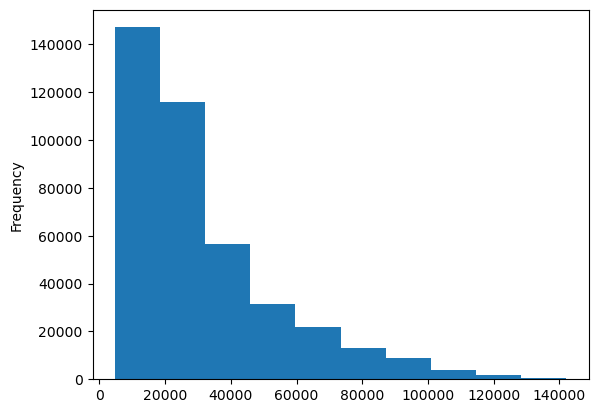

In [31]:
df.SalePrice.plot.hist()

### Parsing dates

When we work with time series data, we want to enrich the time and date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [32]:
# Import data again but this time using the parse dates
df = pd.read_csv(r"data/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory = False, 
                parse_dates = ["saledate"])

In [33]:
df.saledate.dtype

dtype('<M8[ns]')

In [34]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

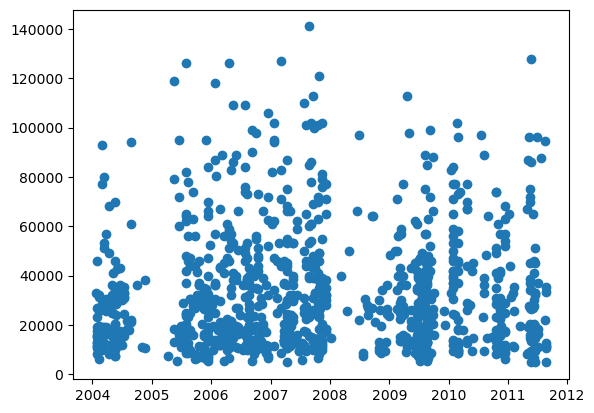

In [35]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [36]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [38]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [39]:
### Sort DataFrame by saledate
df.sort_values(by=["saledate"], inplace = True, ascending = True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [40]:
# Making a copy of the original dataset
df_original = df.copy()

### Add datetime parameters for `saledate` column

In [41]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayofWeek"] = df.saledate.dt.day_of_week

In [42]:
df["saleYear"].head()

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
Name: saleYear, dtype: int32

In [43]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [44]:
# Since we have enriched we can remove the saledate column but I have chose not to
# df.drop("saledate", axis = 1, inplace = True)

In [45]:
# Checking the values of other columns
df.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling

In [46]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1, 
                             random_state = 42)

model.fit(df.drop("SalePrice", axis = 1), df["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [48]:
type(df["UsageBand"])

pandas.core.series.Series

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

In [49]:
pd.api.types.is_float_dtype(df["UsageBand"])

False

In [50]:
# Find the columns which contains strings

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [51]:
random_dict = {"key1": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
    print(f"This is the key: {key}",
          f"This is the value: {value}")

This is the key: key1 This is the value: hello
This is the key: key2 This is the value: world!


In [52]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 12  fi

In [54]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [55]:
df.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [56]:
df.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

Thanks to pandas Categories, we can now access the string data in the form of numbers.

In [57]:
# Dealing with missing data

df.isnull().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

In [58]:
## Saving the data

df.to_csv(r"Data/bluebook-for-bulldozers/bluebook-for-bulldozers/df_tmp.csv", 
          index= False)

In [59]:
# Importing the df

df_tmp = pd.read_csv(r"Data/bluebook-for-bulldozers/bluebook-for-bulldozers/df_tmp.csv",
         low_memory = False)

df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17,1989-01-31,1989-01-31,1989-01-31,1989-01-31


In [60]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## Filling Missing Values

### Filling numerical missing values first

In [61]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek


In [62]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [63]:
# Checking which numeric columns have null values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [64]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Adding an extra column indicating if the value was missing
            df_tmp[label+"is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median()) # Median is more robust

In [65]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [66]:
df_tmp.auctioneerIDis_missing.value_counts()

auctioneerIDis_missing
False    392562
True      20136
Name: count, dtype: int64

In [67]:
df_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
saledate                                   0
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks     

### Filling and turning categorical variables into numbers 

In [68]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [69]:
#Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Adding binary column to indicate whether sample had missing value
        df_tmp[label+"is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [70]:
pd.Categorical(df_tmp["state"]).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [71]:
pd.Categorical(df_tmp["UsageBand"]).codes # +1 turns -1 into 0

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [72]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [73]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 104 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(47), float64(3), int16(5), int64(9), int8(40)
memory usage: 76.0 MB


In [74]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingis_missing,False,True,False,True,False
Blade_Typeis_missing,False,True,False,True,False
Travel_Controlsis_missing,False,True,False,True,False
Differential_Typeis_missing,True,False,True,False,True


In [75]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 104, dtype: int64

Now all the data is numeric and no data is missing.

In [76]:
len(df_tmp)

412698

In [77]:
%%time
# Instantiate model 
model = RandomForestRegressor(n_jobs = -1, random_state = 42)

#Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: total: 1h 16min 52s
Wall time: 24min 40s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [78]:
model.score(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

0.9878577041620581

Why isn't the metric really reliable?

## Splitting data into train/Validation sets

In [79]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [80]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [81]:
#Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_train), len(df_val)

(401125, 11573)

In [82]:
#Split data into X and y
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val.SalePrice

In [83]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 103), (401125,), (11573, 103), (11573,))

In [84]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function

In [85]:
# Create evaluation function : which is RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_pred),
              "Valid MAE": mean_absolute_error(y_valid, val_pred),
              "Training RMSLE": rmsle(y_train, train_pred),
              "Valid RMSLE": rmsle(y_valid, val_pred),
              "Training R^2": r2_score(y_train, train_pred),
              "Valid R^2": r2_score(y_valid, val_pred)}
    return scores

### Testing our model on a subset(to tune hyperparameters)

In [86]:
# %% time
# model = RandomForestRegressor(n_jobs = -1, 
#                               random_state = 42)
# model.fit(X_train, y_train)

### Takes a lot of time to run

In [87]:
# change max_samples value
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42, 
                              max_samples = 10000)

model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [88]:
%%time
model.fit(X_train, y_train)

CPU times: total: 2min 59s
Wall time: 26.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [89]:
show_scores(model)

{'Training MAE': 5450.935152757867,
 'Valid MAE': 7224.701195886978,
 'Training RMSLE': 0.2546126901324718,
 'Valid RMSLE': 0.29684803008195015,
 'Training R^2': 0.8649084064937684,
 'Valid R^2': 0.8314709546434551}

### Hyperparameter Tuning with RandomizedSearchCV

In [90]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=10, # Should be much more for the best case
                              cv=5,
                              verbose = True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\vaibh\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\

CPU times: total: 1min 45s
Wall time: 7min 11s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [91]:
#Find the best hyperparameters
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 12,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [92]:
# Evaluation
show_scores(rs_model)

{'Training MAE': 6279.772125533662,
 'Valid MAE': 7767.916085370401,
 'Training RMSLE': 0.28587497124599565,
 'Valid RMSLE': 0.3115407679176736,
 'Training R^2': 0.8236665881669877,
 'Valid R^2': 0.7992142196032685}

In [93]:
##Train a model with the best hyperparameters

In [162]:
%%time
# Most ideal hyperparameters (The above code was run multiple times)
model = RandomForestRegressor(n_estimators = 20,
                                    min_samples_leaf = 1,
                                    min_samples_split = 14,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                    max_samples = None)

# Fit the model
model.fit(X_train, y_train)

CPU times: total: 2min 45s
Wall time: 26 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=20,
                      n_jobs=-1)

In [141]:
%%time
# Most ideal hyperparameters (The above code was run multiple times)
model2 = RandomForestRegressor(n_estimators = 90,
                                    min_samples_leaf = 11,
                                    min_samples_split = 12,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                    max_samples = None)

# Fit the model
model2.fit(X_train, y_train)

CPU times: total: 14min 13s
Wall time: 2min 5s


RandomForestRegressor(max_features=0.5, min_samples_leaf=11,
                      min_samples_split=12, n_estimators=90, n_jobs=-1)

In [163]:
# Score of the model trained on the entire dataset
show_scores(model)

{'Training MAE': 2926.0018108603604,
 'Valid MAE': 6063.071815613713,
 'Training RMSLE': 0.14411159126334616,
 'Valid RMSLE': 0.2502223635849589,
 'Training R^2': 0.959254075851047,
 'Valid R^2': 0.8781900756792869}

In [142]:
show_scores(model2)

{'Training MAE': 3832.939364837235,
 'Valid MAE': 5991.668226091691,
 'Training RMSLE': 0.18530939806140725,
 'Valid RMSLE': 0.24451683421600878,
 'Training R^2': 0.9296106551525526,
 'Valid R^2': 0.8768978208786455}

## Make predictions on test data

In [96]:
df_test = pd.read_csv(r"Data/bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv", low_memory = False,
                      parse_dates = ["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [97]:
test_preds = model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Backhoe_Mountingis_missing
- Blade_Extensionis_missing
- Blade_Typeis_missing
- Blade_Widthis_missing
- Coupler_Systemis_missing
- ...


In [99]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [105]:
# Preprocessing the test dataset
def preprocessing_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofWeek"] = df.saledate.dt.day_of_week
    
    # fill numeric with median and turns categorical into numbers
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Adding an extra column indicating if the value was missing
                df[label+"is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median()) # Median is more robust
        
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing value as -1
            df[label] = pd.Categorical(content).codes+1
    
    
    return df

In [127]:
df_test = preprocessing_data(df_test)
df_test.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [131]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,False,False,False,True,True,False


In [109]:
# Making predictions on the updated test dataset
X_preds = model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerIDis_missing


In [129]:
# df_test = df_test.drop("auctioneerID_is_missing", axis = 1)

In [117]:
# df_test has no missing value in auctioneerID
df_test["auctioneerIDis_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerID_is_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,False,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,True,True,True,True,True,False,False
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,True,True,True,True,True,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,False,False,False,True,True,False,False


In [124]:
df_train["auctioneerIDis_missing"]

0         False
1         False
2         False
3         False
4         False
          ...  
401120    False
401121    False
401122    False
401123    False
401124    False
Name: auctioneerIDis_missing, Length: 401125, dtype: bool

In [136]:
set(X_train.columns) - set(df_test.columns)

set()

In [135]:
df_test = df_test.reindex(columns=list(X_train.columns))
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True


In [164]:
# Predictions on Test Dataset
test_preds = model.predict(df_test)

In [165]:
test_preds

array([26649.66523672, 22690.20833333, 77561.84043489, ...,
       16510.60476392, 23547.95596764, 24596.727025  ])

In [166]:
len(test_preds)

12457

In [167]:
# Formatting the output file
df_res = pd.DataFrame()
df_res["SalesID"] = df_test["SalesID"]
df_res["SalePrice"] = test_preds
df_res

,SalesID,SalePrice
0,1227829,26649.665237
1,1227844,22690.208333
2,1227847,77561.840435
3,1227848,73691.370211
4,1227863,64243.768899
...,...,...
12452,6643171,49825.187746
12453,6643173,16597.666690
12454,6643184,16510.604764
12455,6643186,23547.955968


In [168]:
df_res.to_csv("data/bluebook-for-bulldozers/bluebook-for-bulldozers/test_result.csv", index = False)

### Feature Importance

In [169]:
len(model.feature_importances_)

103

In [170]:
X_train.shape

(401125, 103)

In [171]:
model.feature_importances_

array([3.08299489e-02, 2.20111415e-02, 4.25543091e-02, 1.01512761e-03,
       2.95017660e-03, 2.13227707e-01, 2.59459597e-03, 8.63158312e-04,
       6.50020401e-02, 3.48783328e-02, 3.53476754e-02, 5.89697115e-02,
       4.67672245e-03, 1.11048457e-02, 1.73396330e-01, 3.39148046e-02,
       5.46669569e-03, 6.05353042e-03, 2.53555734e-03, 2.16212044e-03,
       5.64218237e-02, 7.78029859e-04, 4.69035104e-04, 8.83951409e-04,
       1.73217437e-04, 1.46662955e-03, 1.98373459e-05, 2.86728495e-05,
       2.00091884e-02, 1.09762818e-03, 5.48485078e-03, 3.42061296e-03,
       5.23892557e-03, 3.87296848e-03, 1.55667997e-04, 2.83341699e-04,
       2.45502292e-03, 6.90276934e-04, 1.27485067e-02, 5.09950835e-06,
       3.19363585e-06, 8.48703380e-04, 1.33588519e-03, 1.46502322e-03,
       5.62233576e-04, 7.09824733e-04, 2.95467042e-04, 2.55434359e-04,
       3.26074485e-03, 7.16358949e-04, 1.72632565e-04, 2.72192668e-04,
       2.38951947e-02, 4.37554758e-03, 5.13584719e-03, 2.61250678e-03,
      

In [176]:
# Helper function
def plot_importance(columns, importances, n=15):
    df = (pd.DataFrame({"features":columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataFrame
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importance"][:15])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    

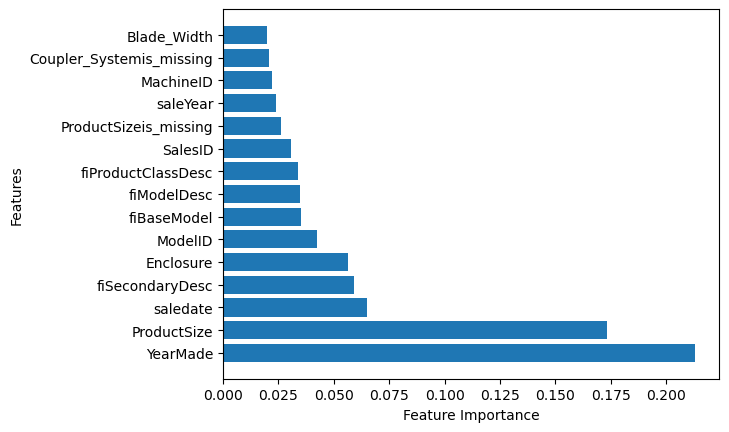

In [177]:
plot_importance(X_train.columns, model.feature_importances_)

In [178]:
df["ProductSize"].value_counts()

ProductSize
Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: count, dtype: int64